In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("C://Users//Cindy//Dropbox//Spring Quarter 2022//STA 160//ScrapedData")

In [114]:
FOX = pd.read_csv('FOX.csv')
ABC = pd.read_csv('ABC.csv')
CBS = pd.read_csv('CBS.csv')
CNN = pd.read_csv('CNN.csv')
MSNBC = pd.read_csv('MSNBC.csv')


In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cindy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

The below code obtains overall sentiment analysis for each headline, followed by sentiment analysis on each word of each headline.

In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.tokenize import word_tokenize, RegexpTokenizer
sia = SIA()
FOXresults = []
ABCresults = []
CBSresults = []
CNNresults = []
MSNBCresults = []
posFOX = []
negFOX = []
neuFOX = []
posABC = []
negABC = []
neuABC = []
posCBS = []
negCBS = []
neuCBS = []
posCNN = []
negCNN = []
neuCNN = []
posMSNBC = []
negMSNBC = []
neuMSNBC = []
              


for lineFOX in FOX.Title:
    tokenized_sentence = nltk.word_tokenize(lineFOX)
    pol_score = sia.polarity_scores(lineFOX)
    pol_score['headline'] = lineFOX
    FOXresults.append(pol_score)
    for i in tokenized_sentence:
        if (sia.polarity_scores(i)['compound']) >= 0.2:
            posFOX.append(i)
        elif (sia.polarity_scores(i)['compound']) <= -0.2:
            negFOX.append(i)
        else:
            neuFOX.append(i)   

    
for lineABC in ABC.Title:
    tokenized_sentence = nltk.word_tokenize(lineABC)
    pol_score = sia.polarity_scores(lineABC)
    pol_score['headline'] = lineABC
    ABCresults.append(pol_score)
    for i in tokenized_sentence:
        if (sia.polarity_scores(i)['compound']) >= 0.2:
            posABC.append(i)
        elif (sia.polarity_scores(i)['compound']) <= -0.2:
            negABC.append(i)
        else:
            neuABC.append(i)  

for lineCBS in CBS.Title:
    tokenized_sentence = nltk.word_tokenize(lineCBS)
    pol_score = sia.polarity_scores(lineCBS)
    pol_score['headline'] = lineCBS
    CBSresults.append(pol_score)
    for i in tokenized_sentence:
        if (sia.polarity_scores(i)['compound']) >= 0.2:
            posCBS.append(i)
        elif (sia.polarity_scores(i)['compound']) <= -0.2:
            negCBS.append(i)
        else:
            neuCBS.append(i)   
for lineCNN in CNN.Title:
    tokenized_sentence = nltk.word_tokenize(lineCNN)
    pol_score = sia.polarity_scores(lineCNN)
    pol_score['headline'] = lineCNN
    CNNresults.append(pol_score)
    for i in tokenized_sentence:
        if (sia.polarity_scores(i)['compound']) >= 0.2:
            posCNN.append(i)
        elif (sia.polarity_scores(i)['compound']) <= -0.2:
            negCNN.append(i)
        else:
            neuCNN.append(i) 
for lineMSNBC in MSNBC.Title:
    tokenized_sentence = nltk.word_tokenize(lineMSNBC)
    pol_score = sia.polarity_scores(lineMSNBC)
    pol_score['headline'] = lineMSNBC
    MSNBCresults.append(pol_score)
    for i in tokenized_sentence:
        if (sia.polarity_scores(i)['compound']) >= 0.2:
            posMSNBC.append(i)
        elif (sia.polarity_scores(i)['compound']) <= -0.2:
            negMSNBC.append(i)
        else:
            neuMSNBC.append(i)

Convert from dictionary to dataframe

In [116]:
sentFOX = pd.DataFrame.from_dict(FOXresults)
sentABC = pd.DataFrame.from_dict(ABCresults)
sentCBS = pd.DataFrame.from_dict(CBSresults)
sentCNN = pd.DataFrame.from_dict(CNNresults)
sentMSNBC = pd.DataFrame.from_dict(MSNBCresults)

Label each headline based on their compound values, with above 0.2 as positive, below -0.2 as negative, and in between as neutral.

In [121]:
sentFOX['label'] = 0
sentFOX.loc[sentFOX['compound'] > 0.2, 'label'] = 1
sentFOX.loc[sentFOX['compound'] < -0.2, 'label'] = -1
sentFOX.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.358  0.642  0.0   -0.4201   
2  0.000  1.000  0.0    0.0000   
3  0.116  0.884  0.0   -0.1779   
4  0.423  0.577  0.0   -0.6597   

                                            headline  label  
0  Texas school shooter was ‘flashing red’: Forme...      0  
1          Ian Prior: This is 'absolutely appalling'     -1  
2  Biden almost immediately politicizes response ...      0  
3  We have to be willing to confront the conversa...      0  
4       This is pure evil: Texas lieutenant governor     -1

In [122]:
sentABC['label'] = 0
sentABC.loc[sentABC['compound'] > 0.2, 'label'] = 1
sentABC.loc[sentABC['compound'] < -0.2, 'label'] = -1
sentABC.head()

neg    neu  pos  compound  \
0  0.156  0.844  0.0   -0.3400   
1  0.223  0.777  0.0   -0.3182   
2  0.436  0.364  0.2   -0.3182   
3  0.000  1.000  0.0    0.0000   
4  0.000  1.000  0.0    0.0000   

                                            headline  label  
0  Pressing lawmakers for answers on gun control ...     -1  
1  Victims' families speak out following Texas sc...     -1  
2                         Cruise funnel catches fire     -1  
3  Beto O'Rourke donates blood after school shooting      0  
4        Shipment of formula arrives in Pennsylvania      0

In [123]:
sentCBS['label'] = 0
sentCBS.loc[sentCBS['compound'] > 0.2, 'label'] = 1
sentCBS.loc[sentCBS['compound'] < -0.2, 'label'] = -1
sentCBS.head()

neg    neu   pos  compound  \
0  0.371  0.490  0.14   -0.5106   
1  0.333  0.667  0.00   -0.3612   
2  0.456  0.544  0.00   -0.7717   
3  0.603  0.397  0.00   -0.8225   
4  0.000  1.000  0.00    0.0000   

                                            headline  label  
0  Wells Fargo accused of conducting fake intervi...     -1  
1  Rancher describes financial struggles amid inf...     -1  
2  False and disturbing conspiracy theories sprea...     -1  
3  Navigating through grief and emotions after tr...     -1  
4  London Calling: Australia elects new prime min...      0

In [124]:
sentCNN['label'] = 0
sentCNN.loc[sentCNN['compound'] > 0.2, 'label'] = 1
sentCNN.loc[sentCNN['compound'] < -0.2, 'label'] = -1
sentCNN.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.316  0.684  0.0   -0.5719   
2  0.348  0.652  0.0   -0.7506   
3  0.000  1.000  0.0    0.0000   
4  0.397  0.603  0.0   -0.5574   

                                            headline  label  
0  Global economy is ‘out of balance’ says World ...      0  
1  Satellite images appear to show Russia stealin...     -1  
2  ‘This is an apocalypse’: Southern Baptist Conv...     -1  
3  What to watch for in the Georgia and Texas pri...      0  
4  Expert witness disputes cause of Johnny Depp's...     -1

In [125]:
sentMSNBC['label'] = 0
sentMSNBC.loc[sentMSNBC['compound'] > 0.2, 'label'] = 1
sentMSNBC.loc[sentMSNBC['compound'] < -0.2, 'label'] = -1
sentMSNBC.head()

neg    neu    pos  compound  \
0  0.277  0.531  0.192   -0.4405   
1  0.375  0.460  0.165   -0.4765   
2  0.290  0.710  0.000   -0.6705   
3  0.000  1.000  0.000    0.0000   
4  0.000  1.000  0.000    0.0000   

                                            headline  label  
0  Preventable But Predictable: Activist Slams Ab...     -1  
1  GOP Lawmakers Condemn TX Elementary School Sho...     -1  
2  Texas State Sen: At Least 18 Children, 3 Adult...     -1  
3  Full Speech: Biden Addresses Nation On Texas E...      0  
4  Is Biden Running Out Of Time On Rejoining The ...      0

Obtain frequencies of each neutral, negative and positive headline corresponding to sia model. 

In [126]:
sentFOX['label'].value_counts()

 0    4695
-1    3362
 1    1403
Name: label, dtype: int64

In [127]:
sentABC['label'].value_counts()

 0    4571
-1    2995
 1    1622
Name: label, dtype: int64

In [128]:
sentCBS['label'].value_counts()

 0    3493
-1    2570
 1    1431
Name: label, dtype: int64

In [129]:
sentCNN['label'].value_counts()

 0    6190
-1    4073
 1    1946
Name: label, dtype: int64

In [130]:
sentMSNBC['label'].value_counts()

 0    6555
-1    3764
 1    2248
Name: label, dtype: int64

Combine each mean of each sentiment value, along with their label and compound metrics. 

In [131]:
totalSent = pd.concat([sentFOX.mean(), sentCNN.mean(), sentABC.mean(),sentCBS.mean(),sentMSNBC.mean()], axis=1)
totalSent = totalSent.transpose()
totalSent = totalSent.reset_index()
totalSent['News Outlet'] = ['FOX', 'CNN', 'ABC', 'CBS', 'MSNBC']

C:\Users\Cindy\AppData\Local\Temp\ipykernel_20444\2557884191.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [132]:
totalSent

index       neg       neu       pos  compound     label News Outlet
0      0  0.123929  0.818859  0.057211 -0.110582 -0.207082         FOX
1      1  0.117215  0.820972  0.061815 -0.090440 -0.174216         CNN
2      2  0.119670  0.811931  0.068398 -0.089726 -0.149434         ABC
3      3  0.119711  0.809346  0.070946 -0.087490 -0.151988         CBS
4      4  0.104478  0.830787  0.064738 -0.069669 -0.120633       MSNBC

Plot the sentiment value averages

In [133]:
import plotly.express as px
fig = px.histogram(totalSent,
                   x='News Outlet',
                   title='Sentiment Score by News Outlet | Youtube Headlines',
                   y= ['neg', 'neu','pos', 'compound', 'label'],
                   barmode='group',
                  color_discrete_sequence=["red", "blue", "green"])
fig.update_xaxes( title='News Outlets').update_yaxes(title='Sentiment score')
fig.show()

Overall wordcloud for each news outlet, disregarding sentiment

# Fox Wordcloud 

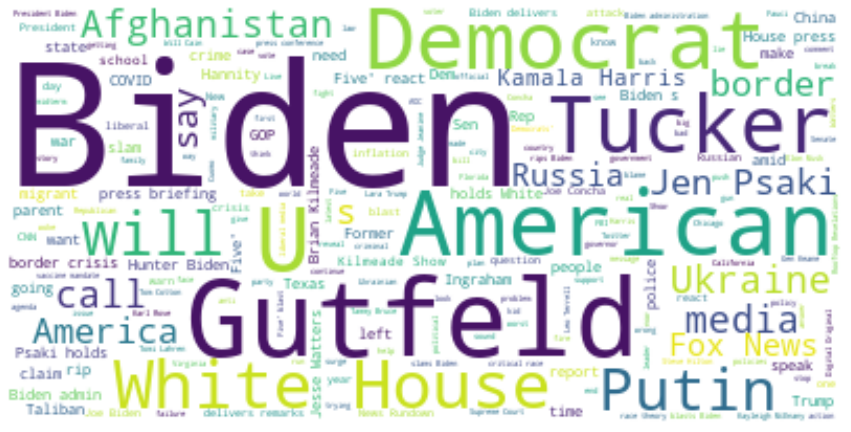

In [141]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

text = " ".join(i for i in sentFOX.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

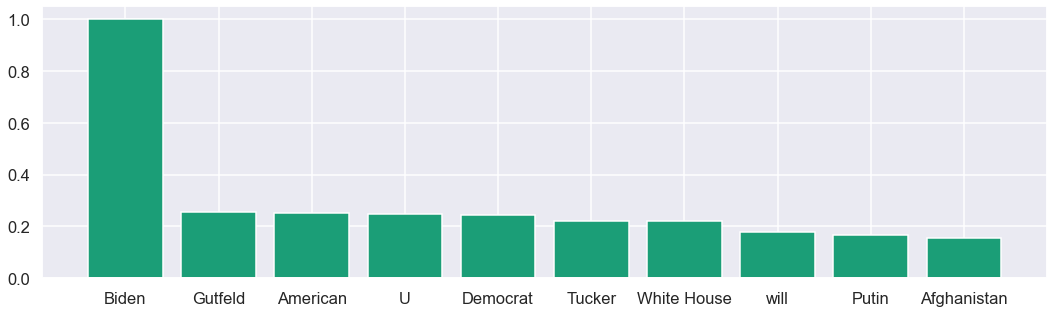

In [142]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# ABC Wordcloud

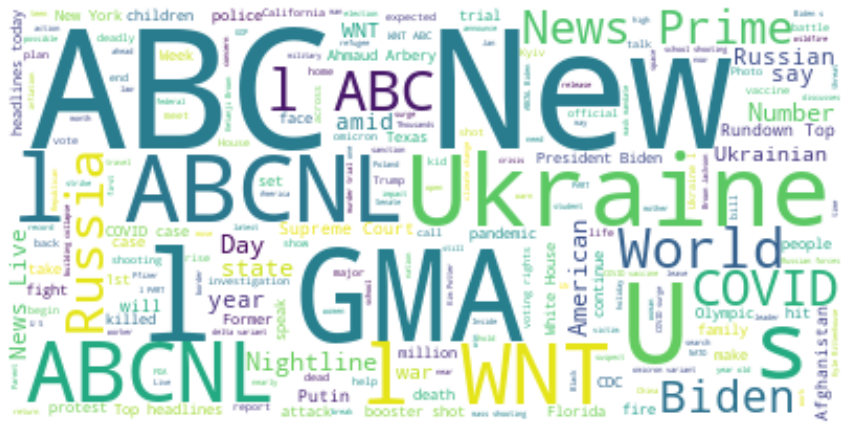

In [143]:
text = " ".join(i for i in sentABC.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

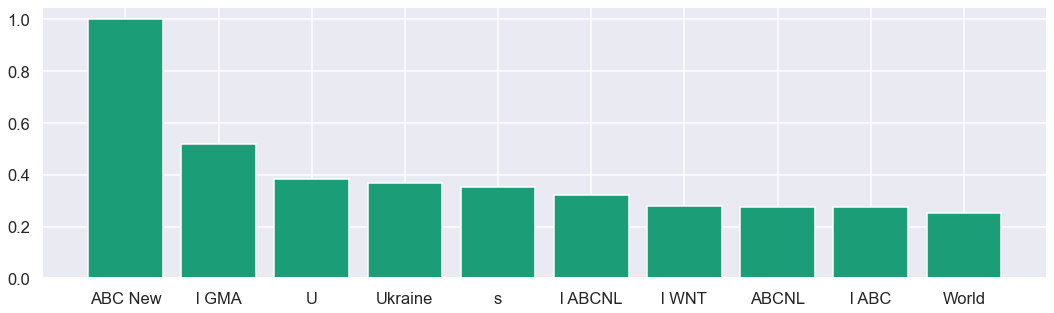

In [144]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# CBS Wordcloud

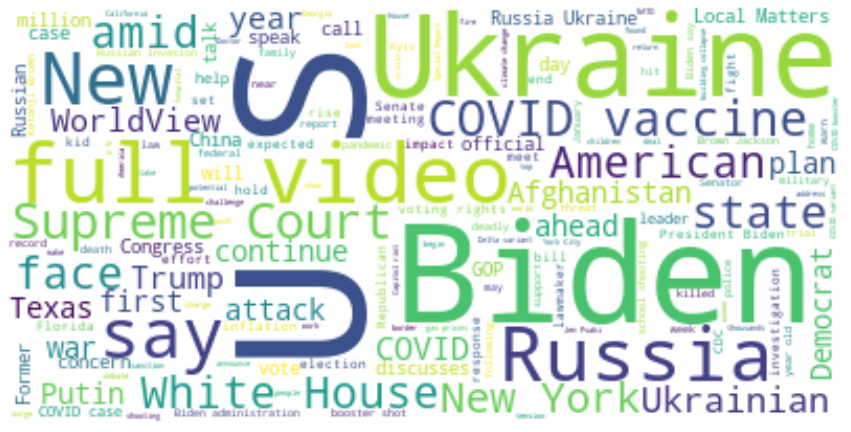

In [146]:
text = " ".join(i for i in sentCBS.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

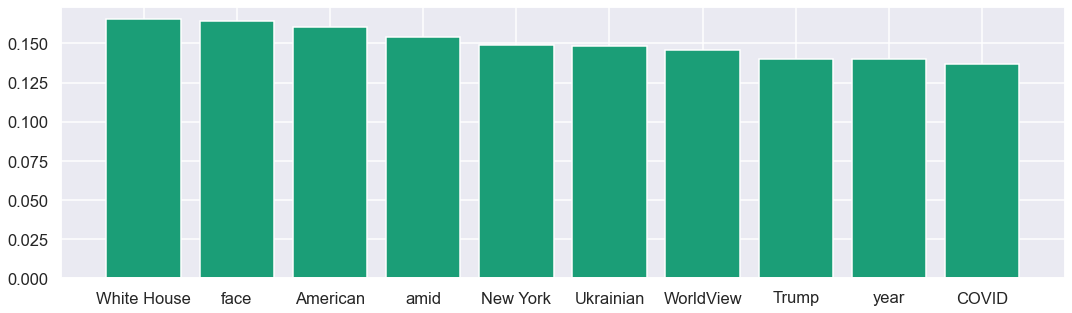

In [147]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[10:20]))
plt.show()

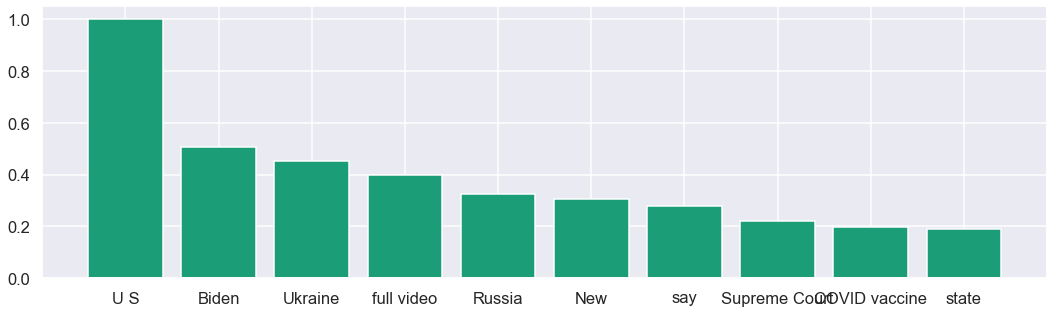

In [148]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# CNN Wordcloud

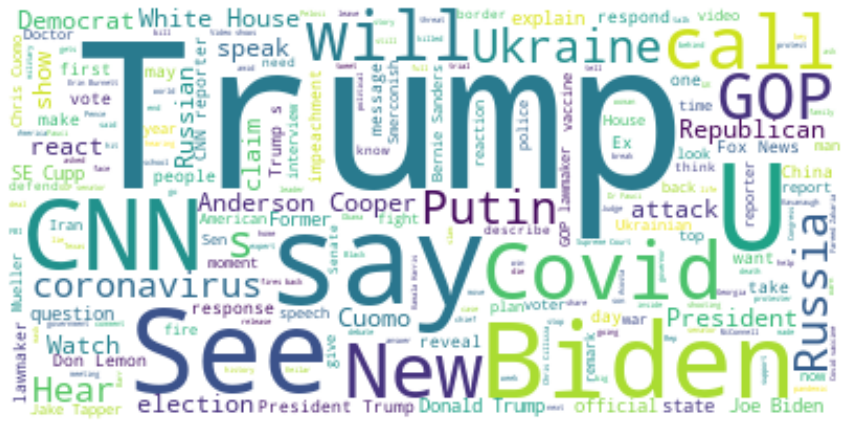

In [149]:
text = " ".join(i for i in sentCNN.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

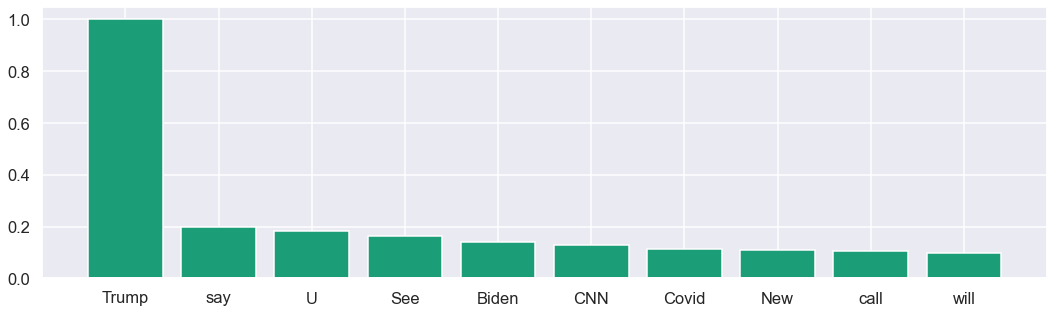

In [150]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# MSNBC Wordcloud

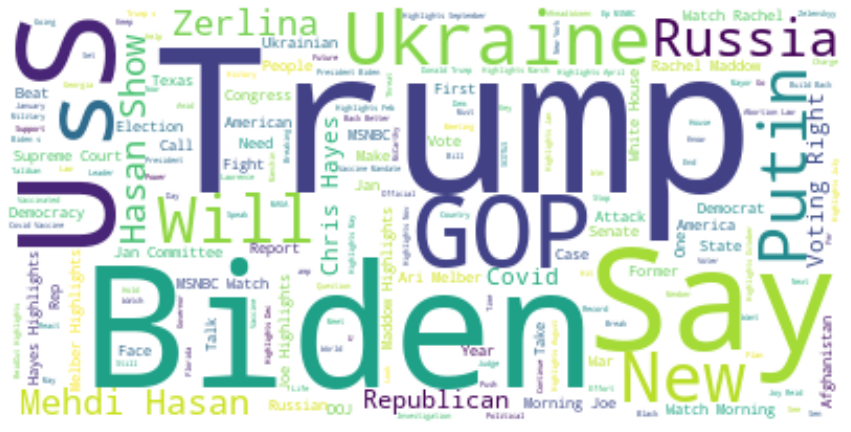

In [151]:
text = " ".join(i for i in sentMSNBC.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

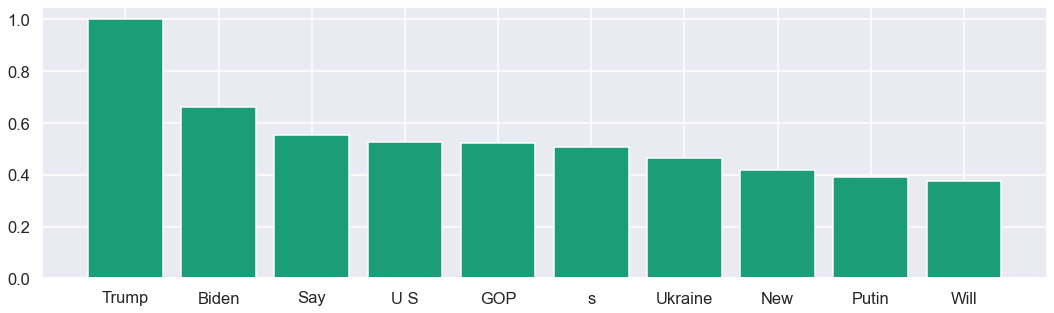

In [152]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Counts the frequency of different sentiment values for each word in different news outlet headlines. (For Sentiment wordclouds below)

In [70]:
def CountFreq(li):
    freq = {}
    for item in li:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq


# FOX Sentiment Word Clouds

Positive Sentiment Words

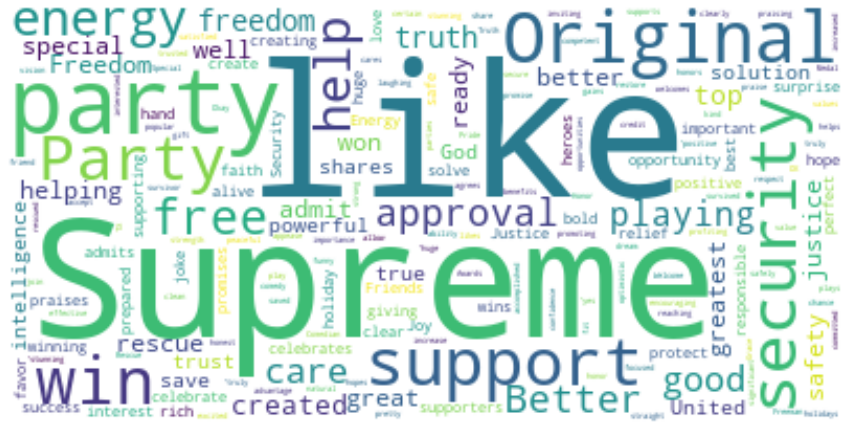

In [80]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(posFOX))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

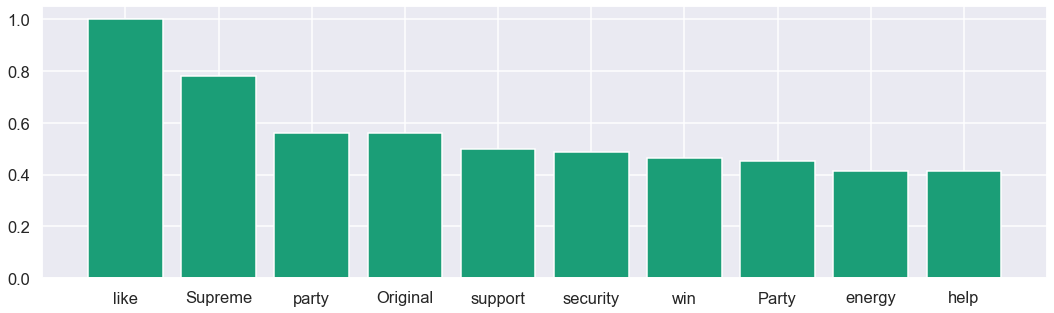

In [81]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Negative Sentiment Words

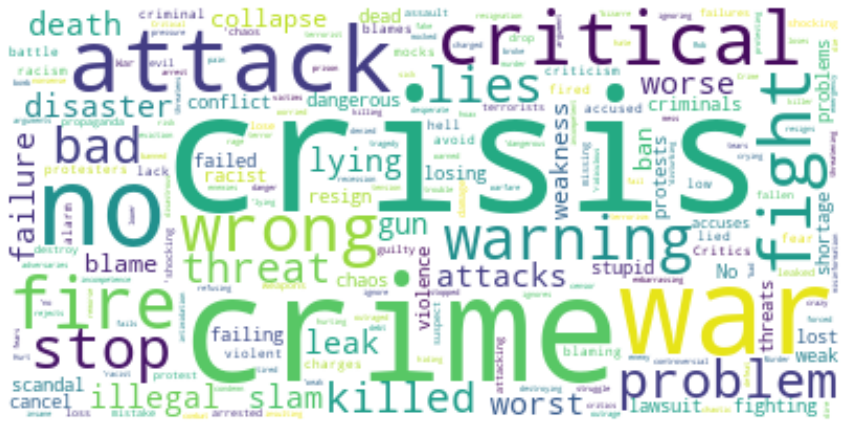

In [82]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(negFOX))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

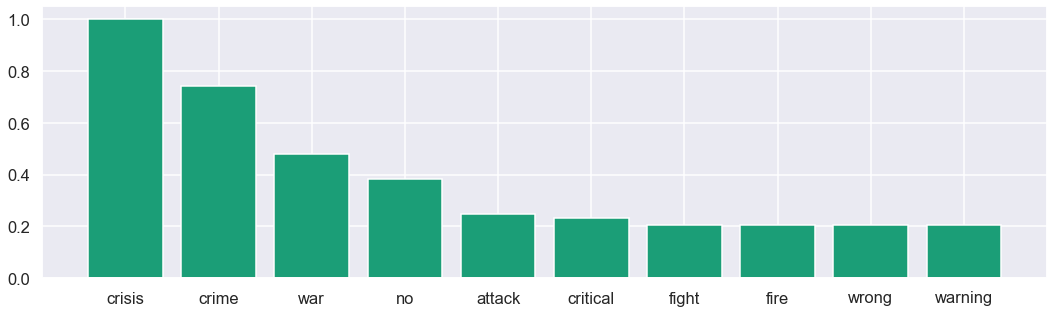

In [83]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

In [106]:
FOX['Title']

0       Texas school shooter was ‘flashing red’: Forme...
1               Ian Prior: This is 'absolutely appalling'
2       Biden almost immediately politicizes response ...
3       We have to be willing to confront the conversa...
4            This is pure evil: Texas lieutenant governor
                              ...                        
9455    Jesse Watters slams anti-Semitic attacks: Thes...
9456    Steve Hilton: Leftist media ‘servants’ are rev...
9457    ‘Outnumbered’ rips 'Cuomo Nepotism Network' af...
9458    Jen Psaki holds White House press briefing | 5...
9459    'Journalism is broken' and Chris Cuomo is an e...
Name: Title, Length: 9460, dtype: object

In [110]:
crisisList = []
for i in FOX["Title"]:
    if "crisis" in i:
        crisisList.append(i)
    else:
        continue
        

In [113]:
crisisList

['Steve Hilton: The Biden baby crisis',
 'Chaffetz rips Biden on border crisis: Cartels run the border',
 "Sen. Bill Hagerty: Lifting Title 42 will turn a crisis into a 'massive disaster'",
 'Sen. Rubio: Biden should have acted on this crisis months ago | The Ben Domenech Podcast',
 "Kamala Harris doesn't intend to address this crisis: Lara Trump",
 "McEnany torches Biden's crisis response: Always late to the party",
 "Biden's actions are ‘counterproductive’ to getting U.S. out of energy crisis: Tim Stewart",
 "'The Five' react to Biden's baby formula crisis",
 'We’re in a crisis in America: President of The National Black Farmers Association',
 "‘The Five’ react to America's fentanyl crisis",
 "Biden's supply chain crisis is one of the greatest national security threats: Hurt",
 'Biden wants the border crisis: GOP lawmaker',
 'DHS Secretary Mayorkas testifies on border crisis',
 "'The Five' rip Biden for allowing border crisis to spiral into chaos",
 'Federal government is ‘complicit’

# CNN Sentiment Word Clouds

Positive Sentiment Words

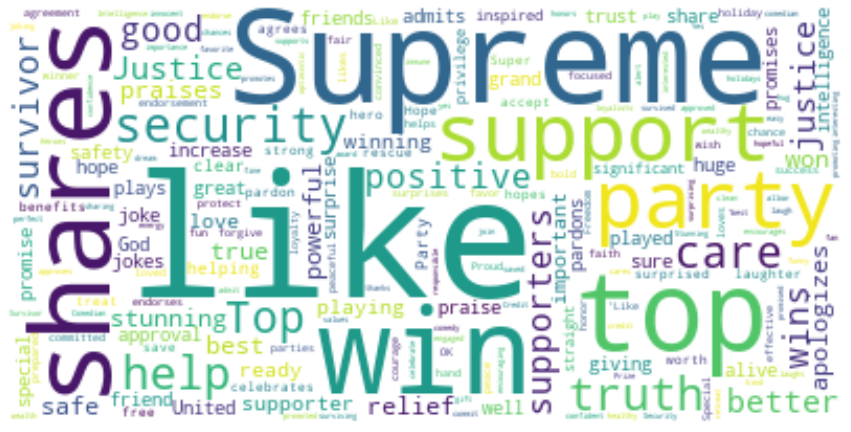

In [76]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(posCNN))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

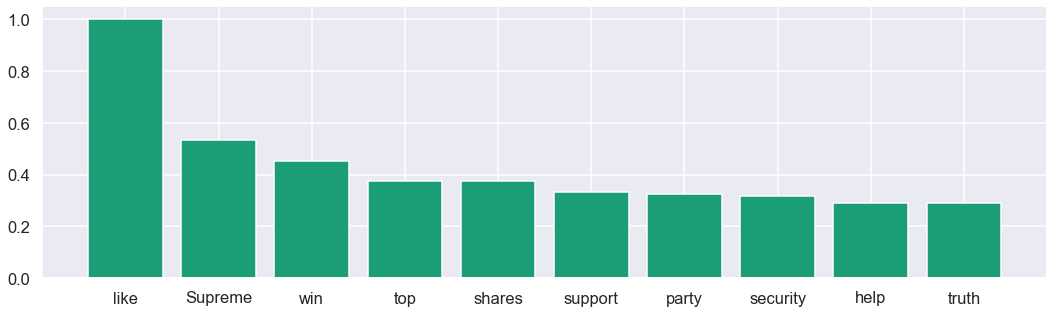

In [77]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Negative Sentiment Words

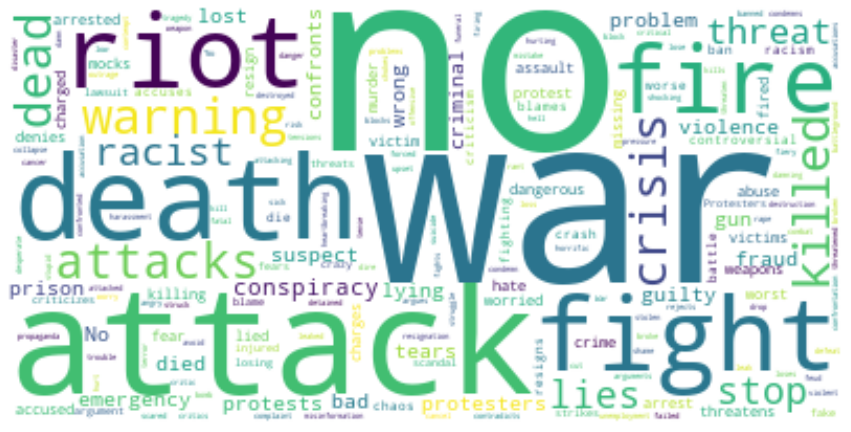

In [78]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(negCNN))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

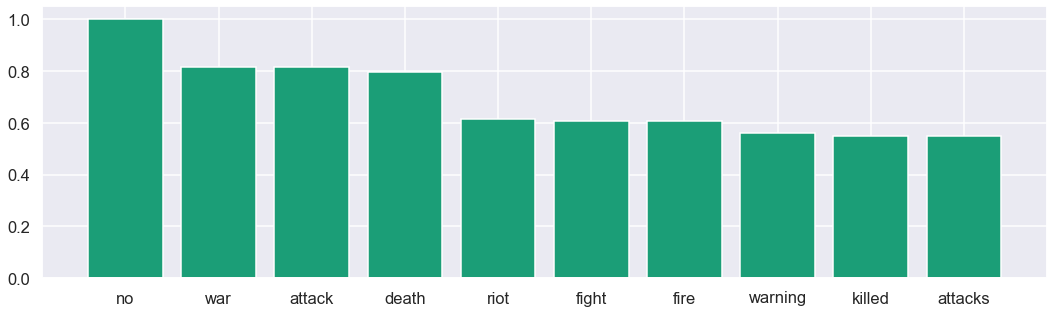

In [79]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# ABC Sentiment Word Clouds

Positive Sentiment Words

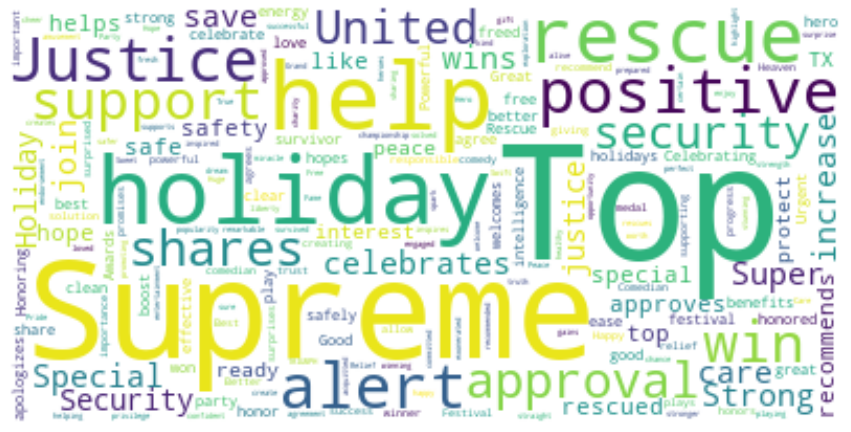

In [84]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(posABC))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

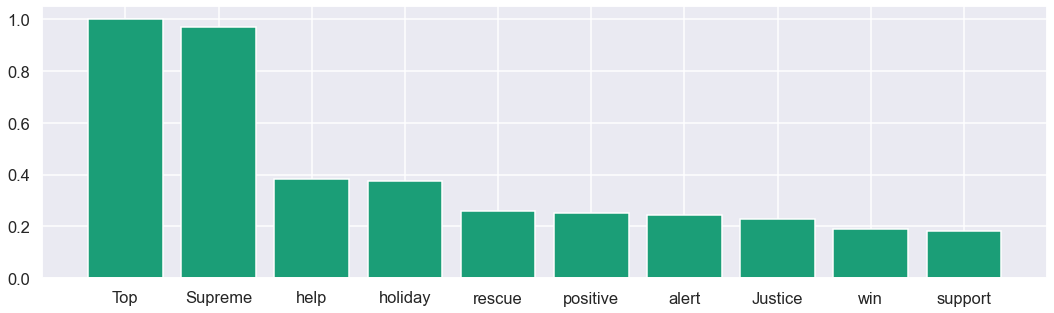

In [85]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Negative Sentiment Words

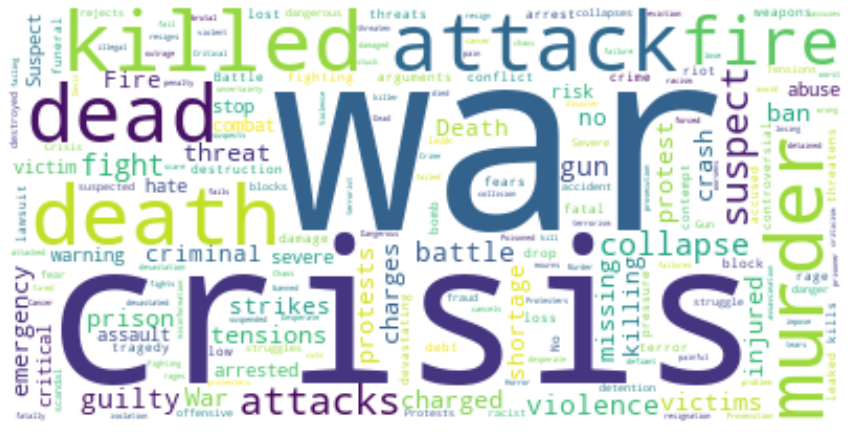

In [86]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(negABC))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

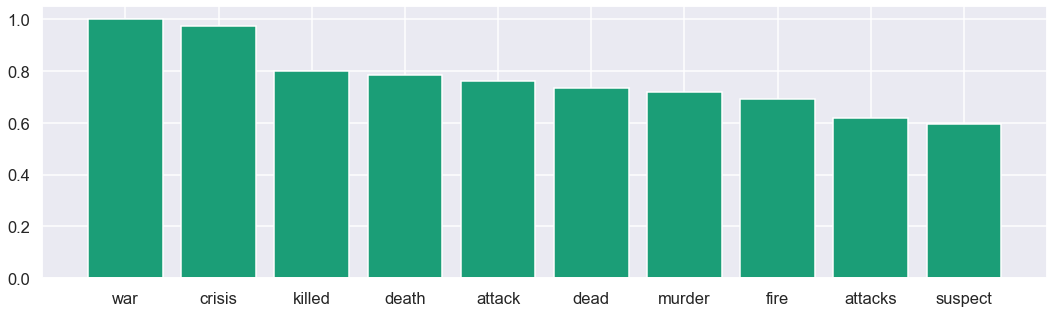

In [87]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# CBS Sentiment Word Clouds

Positive Sentiment Words

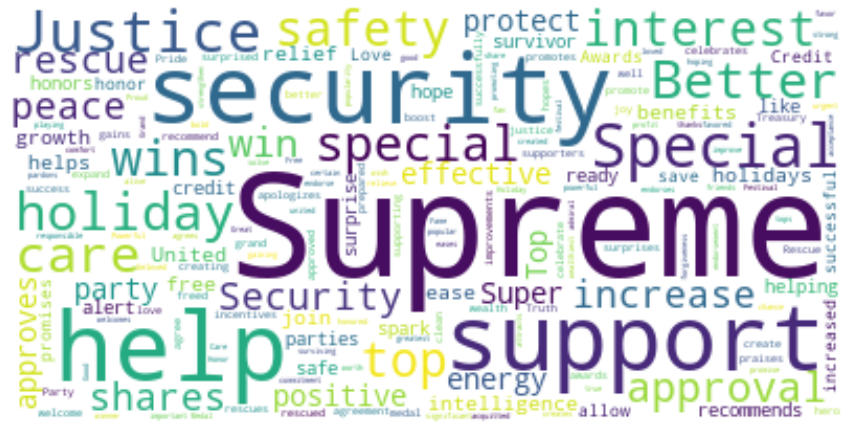

In [88]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(posCBS))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

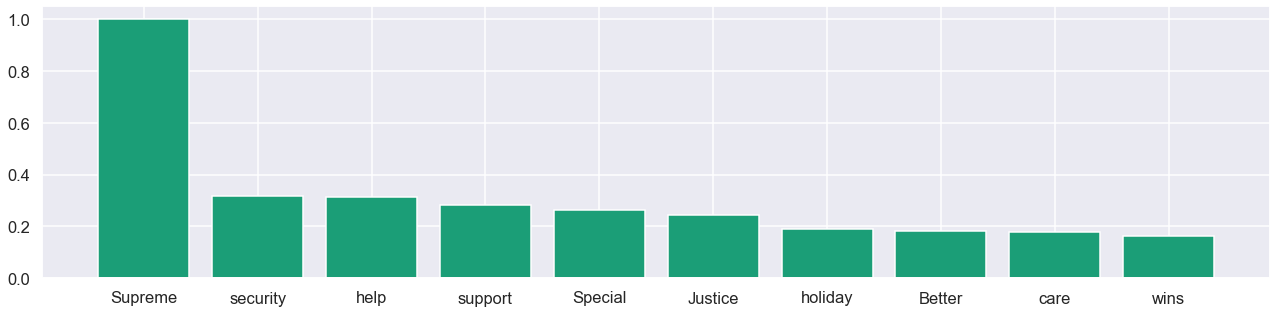

In [92]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(22,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Negative Sentiment Words

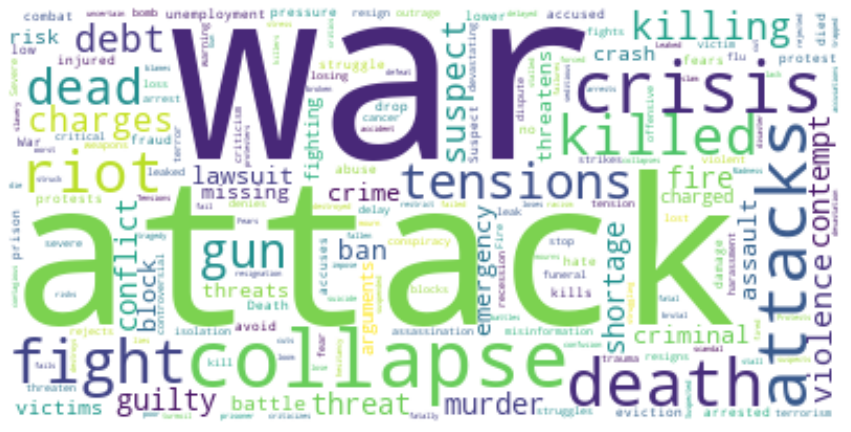

In [93]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(negCBS))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

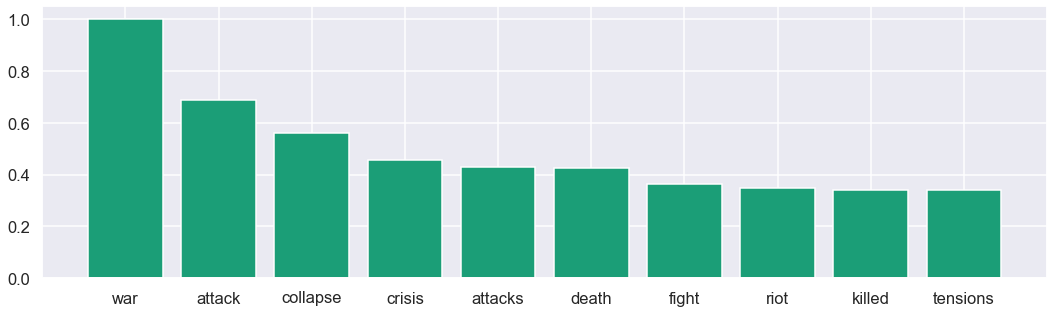

In [94]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

# MNSBC Sentiment Word Clouds

Positive Sentiment Words

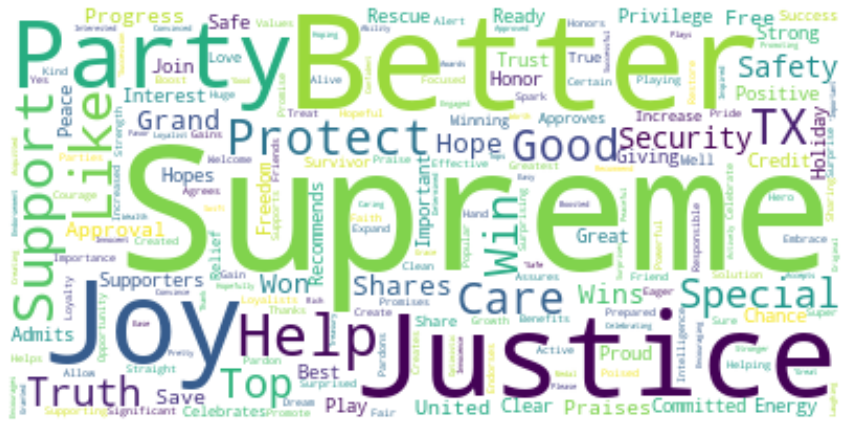

In [137]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(posMSNBC))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

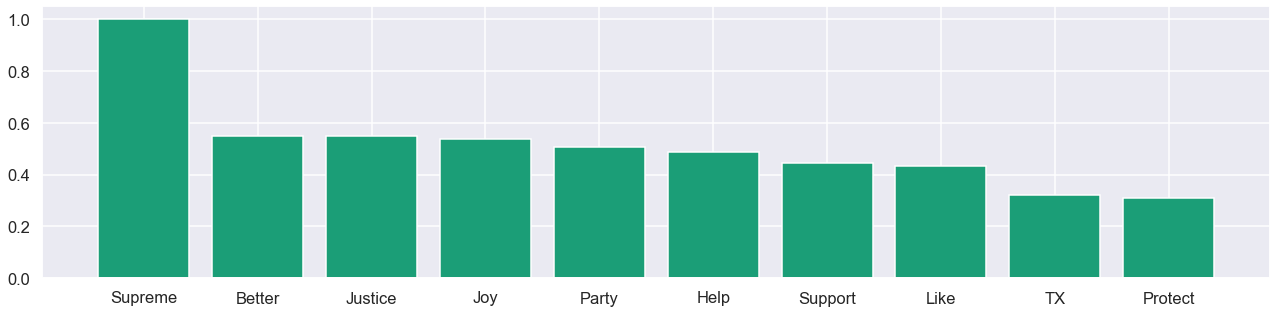

In [138]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(22,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()

Negative Sentiment Words

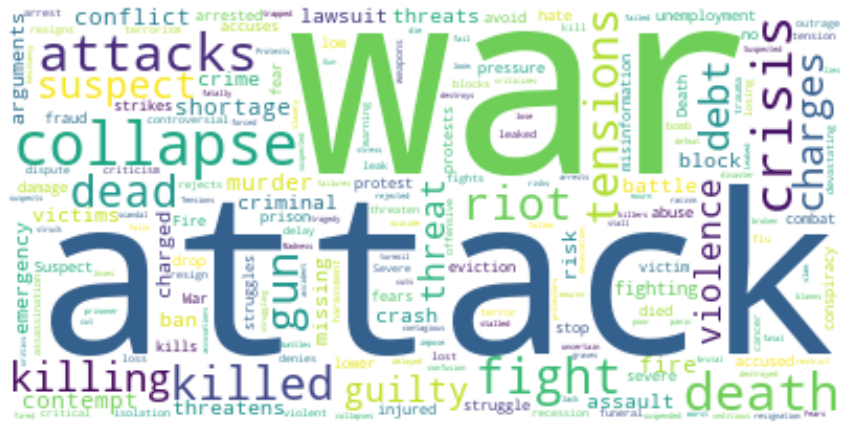

In [139]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(frequencies=CountFreq(negCBS))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

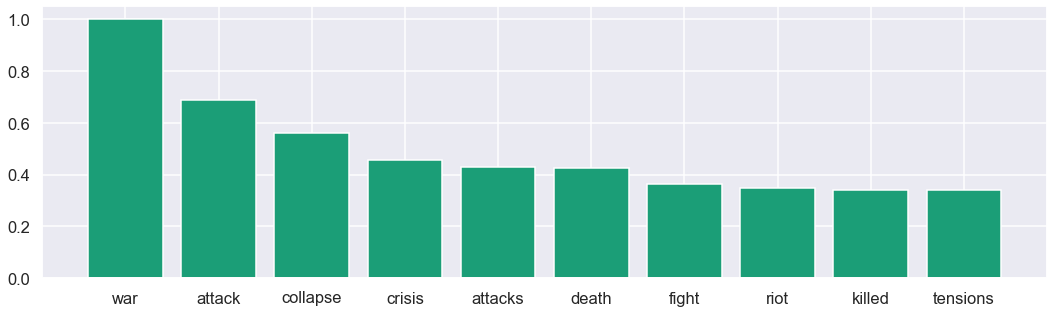

In [140]:
import matplotlib.pyplot as plt
names= []
values = []

f, ax = plt.subplots(figsize=(18,5))

#list(dictionaryName.items())[:N]
plt.bar(*zip(*list(wordcloud.words_.items())[:10]))
plt.show()